In [11]:
## Gauss-Newton Verfahren

k x1	 x2	 x3	 x4	 r		 s
1 0.685 0.691 	 3.017 	 0.414 	 3.170e-01	 1.271e+00
2 0.723 0.803 	 3.069 	 0.606 	 1.415e-01	 8.993e-01
3 0.736 0.798 	 3.075 	 0.603 	 2.100e-02	 7.899e-01
4 0.735 0.796 	 3.074 	 0.604 	 2.620e-04	 7.606e-01
5 0.735 0.796 	 3.075 	 0.604 	 7.740e-05	 7.607e-01
6 0.735 0.796 	 3.074 	 0.604 	 2.204e-05	 7.607e-01
7 0.735 0.796 	 3.075 	 0.604 	 7.751e-06	 7.607e-01
8 0.735 0.796 	 3.074 	 0.604 	 2.590e-06	 7.607e-01
9 0.735 0.796 	 3.075 	 0.604 	 9.131e-07	 7.607e-01
[0.73535666 0.79620273 3.07450154 0.60417956]


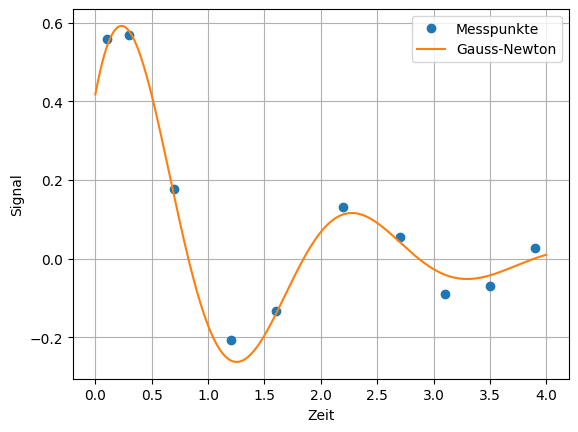

In [12]:
import sys, os
from matplotlib.pylab import cholesky
import numpy as np
import matplotlib.pyplot as plt
#import numerik_functions as nf  # Importiert numerik_functions.py als nf
from scipy.linalg import solve_triangular,lu,lu_solve


#s0=100
#x0 =80300

# Parameter for Gauss-Newton test
tk = np.array([0.1, 0.3, 0.7, 1.2, 1.6, 2.2, 2.7, 3.1, 3.5, 3.9])
yk = np.array([0.558, 0.569, 0.176, -0.207, -0.133, 0.132, 0.055, -0.090, -0.069, 0.027])

# Gauss-Newton Algorithmus
def gauss_newton(function, jacobi, x0, xdata, ydata, tol=1e-6, max_iter=100, damped=False, maxDampingIter=100):
    """
    Gauss-Newton Algorithmus für nicht lineare Gleichungen

    Eingabe
    function:   Funktion welche gefitet werden soll
    jacobi:     Jakobi-Matrix der Funktion welche gefittet werden soll: Jacobi = Df(x)
    x0:         Erster Schätzwert der Parameter. Müssen in der nähe der Lösung liegen damit der Algorithmus konvergiert.
    ydata:      Vektor mit Messdaten
    xdata:      Vektor mit Zeitdaten
    max_iter:   Maximale Interationsschritte (default: 100)
    tol:        Toleranz der Kovnergenz (default: 1e-6)

    Rückgabe:
    parameter:  Lösungsvektor, Zahlen der Parameter, damit die Lösung den kleinsten fehler Quadrate der Messdaten entspricht
    """

    k = 0 #Anzahl Interationen
    parameter = x0.copy() #muss in der nähe der Lösung liegen damit es konvergiert
    y = function(xdata, parameter) - ydata
    j = jacobi(xdata, parameter)

    r = np.array([np.linalg.norm(j.T@y)])
    print("k", "x1\t", "x2\t", "x3\t", "x4\t", "r\t\t", "s")
    
    while r > tol and k < max_iter:
        j = jacobi(xdata, parameter)
        y = function(xdata, parameter) - ydata
       
        # Normalengleichung lösen
        #deltax = np.linalg.solve(j.T@j, -j.T@y)

        # Mit QR-Zerlegung
        Q,R = np.linalg.qr(j)
        deltax = solve_triangular(R, -Q.T@y, lower=False)
        # Falls Dämpfung aktiviert ist
        if damped == True:
            delta_k = 1
            n = 1
            while  np.linalg.norm(parameter + deltax*delta_k) > np.linalg.norm(parameter) and n < maxDampingIter:
                print("Dämpfung", n)
                delta_k = delta_k / 2
                n = n + 1
            deltax = deltax*delta_k

        parameter = parameter + deltax
        k += 1

        r = np.linalg.norm(j.T@y)
        s = np.sum((y-function(xdata, parameter))**2)
        print(k, round(parameter[0], 3), 
               round(parameter[1], 3), "\t",
               round(parameter[2], 3), "\t",
               round(parameter[3], 3),"\t",
               "{:.3e}\t".format(r),
               "{:.3e}".format(s))

    return parameter


def model(t, x):
    return x[0]*np.exp(-x[1]*t)*np.sin(x[2]*t+x[3])

def jacobi(t, x):
    J =  np.array([        np.exp(-x[1]*t)*np.sin(x[2]*t+x[3]),
                   -x[0]*t*np.exp(-x[1]*t)*np.sin(x[2]*t+x[3]),
                    x[0]*t*np.exp(-x[1]*t)*np.cos(x[2]*t+x[3]),
                     x[0]*np.exp(-x[1]*t)*np.cos(x[2]*t+x[3])])
    return J.T



startwerte = np.array([0.5, 1, 3, 1])
alpha = gauss_newton(model, jacobi, startwerte, tk, yk, tol=1e-6, max_iter=100)
print(alpha)

# Grössere Anzahl an Messpunkten
time = np.linspace(0,4,501)

# Messpunkte und gefittete Funktion plotten
plt.plot(tk, yk, 'o', label='Messpunkte')
plt.plot(time, model(time, alpha),'-', label='Gauss-Newton')
plt.ylabel('Signal')
plt.xlabel('Zeit')
plt.legend()
plt.grid(True)
plt.show()

## 1.4 Industrielle Anwendung aus der Gas Analytik

[0.    0.001 0.002 ... 0.998 0.999 1.   ]
k x1	 x2	 x3	 x4	 r		 s
1 5.914 -3.149 	 0.633 	 -0.044 	 6.342e+06	 2.691e+10
a0 * 1.1
k x1	 x2	 x3	 x4	 r		 s
1 6.294 -3.445 	 0.714 	 -0.051 	 6.977e+06	 1.990e+10
a0 * 0.8
k x1	 x2	 x3	 x4	 r		 s
1 4.487 -2.179 	 0.388 	 -0.022 	 5.072e+06	 8.745e+10


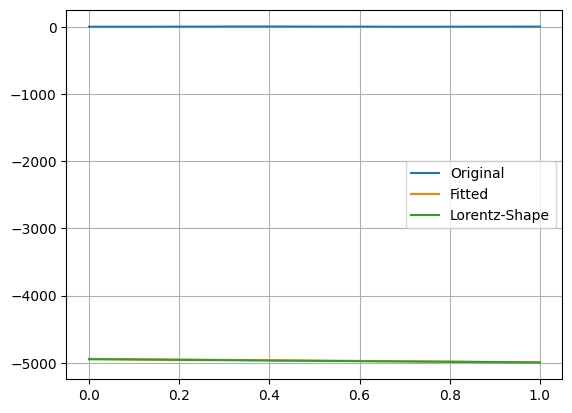

"\ndata = np.genfromtxt('dataP7.txt')\nt_gas = data[:,0]         \ny_gas = data[:,1] \nplt.figure(3)\nplt.plot(t_gas,y_gas,'o')\n\n\ndef lorentz(t, x):\n    return x[0] / (1 + ((t - x[5]) / (x[6]*0.5))**2)\n\ndef model_Gas(t, x):\n    #x1 = x[0] / (1 + ((t-x[5]) / (x[6]*0.5))**2)\n    #x2 = x[1]\n    #x3 = x[2]*t\n    #x4 = x[3]*t**2\n    #x5 = x[4]*t**3\n    return x[0] / (1 + ((t-x[5]) / (x[6]*0.5))**2) + x[1] + x[2]*t + x[3]*t**2 + x[4]*t**3\n\ndef jacobi_Gas(t, x, h=1e-6):\n    \n    #J = np.array([1 / (1 + ((t - x[5]) / (x[6]*0.5))**2),\n    #              1,\n    #              t,\n    #              t**2,\n    #              t**3,\n    #              2*x[0]*t / (1 + ((t - x[5]) / (x[6]*0.5))**2)**2,\n    #              2*x[0]*(t - x[5]) / (1 + ((t - x[5]) / (x[6]*0.5))**2)**3]):\n    n = len(t)\n    m = len(x)\n    J = np.zeros((n, m))\n    \n    for i in range(m):\n        params_plus = x.copy()\n        params_plus[i] += h\n        params_minus = x.copy()\n        params_minus

In [13]:
## Teil 2

# Load data
data = np.loadtxt('dataP7.txt')
sample, signal = data.T

# define Lorentz function
def lorentz(t, x):
    x1, x2, x3, x4, s0, x0, k = x
    return k/(1+(((t-x0)/(s0))**2))

# define vectorized Lorentz function
def poly_lorentz(x, params):
    d, c, b, a, gamma, x0, A = params
    y = a*x**3 + b*x**2 + c*x + d + A / (1 + ((x-x0)/gamma)**2)
    return y

#calculate jacobean of vectorized Lorentz function
def jacobi_poly_lorentz(x, params, h=1e-6):
    
    n = len(x)
    m = len(params)
    J = np.zeros((n, m))
    
    for i in range(m):
        params_plus = params.copy()
        params_plus[i] += h
        params_minus = params.copy()
        params_minus[i] -= h
        
        
        df = (poly_lorentz(x, params_plus) - poly_lorentz(x, params_minus)) / (2 * h)
        
        J[:, i] = df
    
    return J


#Skalieren
sample_min = sample[0]
sample_old = sample
sample = (sample - sample_min)/(sample[-1]-sample_min)
print(sample)
#plt.plot(sample, signal)
xk = np.array([0.5, 8.3, -20, 14, 0.085, 0.35, 2.9],dtype=float)
xk_high = xk * 1.1
xk_low = xk *0.8
maxint = 200
tol = 1e-8




#params = gauss_newton(y, Jakobi, xk, signal, sample, maxint, tol)
params = gauss_newton(poly_lorentz, jacobi_poly_lorentz, xk, signal, sample, maxint, tol)
print("a0 * 1.1")
params_high = gauss_newton(poly_lorentz, jacobi_poly_lorentz, xk_high, signal, sample, maxint, tol)
print("a0 * 0.8")
params_low = gauss_newton(poly_lorentz, jacobi_poly_lorentz, xk_low, signal, sample, maxint, tol)
time = np.linspace(0,1,1001)
plt.plot(sample, signal)
plt.plot(sample, poly_lorentz(sample, params))
plt.plot(sample, lorentz(sample, params))
plt.legend(("Original", "Fitted", "Lorentz-Shape"))
plt.grid()
plt.show()















#old
"""
data = np.genfromtxt('dataP7.txt')
t_gas = data[:,0]         
y_gas = data[:,1] 
plt.figure(3)
plt.plot(t_gas,y_gas,'o')


def lorentz(t, x):
    return x[0] / (1 + ((t - x[5]) / (x[6]*0.5))**2)

def model_Gas(t, x):
    #x1 = x[0] / (1 + ((t-x[5]) / (x[6]*0.5))**2)
    #x2 = x[1]
    #x3 = x[2]*t
    #x4 = x[3]*t**2
    #x5 = x[4]*t**3
    return x[0] / (1 + ((t-x[5]) / (x[6]*0.5))**2) + x[1] + x[2]*t + x[3]*t**2 + x[4]*t**3

def jacobi_Gas(t, x, h=1e-6):
    
    #J = np.array([1 / (1 + ((t - x[5]) / (x[6]*0.5))**2),
    #              1,
    #              t,
    #              t**2,
    #              t**3,
    #              2*x[0]*t / (1 + ((t - x[5]) / (x[6]*0.5))**2)**2,
    #              2*x[0]*(t - x[5]) / (1 + ((t - x[5]) / (x[6]*0.5))**2)**3]):
    n = len(t)
    m = len(x)
    J = np.zeros((n, m))
    
    for i in range(m):
        params_plus = x.copy()
        params_plus[i] += h
        params_minus = x.copy()
        params_minus[i] -= h
        
        
        df = (model_Gas(t, params_plus) - model_Gas(t, params_minus)) / (2 * h)
        
        J[:, i] = df
    
    return J



#Skalieren
t_gas_min = t_gas[0]
t_gas_old = t_gas
t_gas = (t_gas - t_gas_min)/(t_gas[-1]-t_gas_min)


startwerte_Gas = np.array([0.5, 8.3, -20, 14, 0.085, 0.35, 2.9],dtype=float)
xk_high = startwerte_Gas * 1.1
xk_low = startwerte_Gas *0.8



alpha_Gas = gauss_newton(model_Gas, jacobi_Gas, startwerte_Gas, t_gas, y_gas, tol=1e-6, max_iter=200)


plt.figure(4)
plt.plot(t_gas,y_gas,'o', label='Messwerte')
plt.plot(t_gas, model_Gas(t_gas, alpha_Gas),'-', label='Gauss-Newton')
plt.plot(t_gas, lorentz(t_gas, alpha_Gas),'-', label='Lorentz-Shape')
plt.ylabel('Signal')
plt.xlabel('Zeit')
plt.legend()
plt.grid(True)
plt.show()
"""